# **Regression case study:Sales and workload in retail industry**

# **Business problem:**



# 1. The data can be investigated with regard to correlations between different features and/or a regression model .
# 2. To predict the No.of sales unit sold for different country with respect to city ,retail depart,HoursOwn,Turnover Month and year .

# **content:**


# The data includes information about sold goods resp. product units,
# the associated turnover and hours worked. This information is grouped by month, 
# store and department of the retailer. Moreover,
# information about the sales area in a specific department as well as about the opening hours of the store is provided.

# **Attribute information**


# Attribute information:
    Month year:it contains month and year ,Month and year format MM.YYYY.
    Time index:ID of the month.
    Country:Country of the store.
    Storeid:ID of the store.
    City:Name of the store, consisting of city and city-internal number.
    Dept.id:ID of department in the store.
    Dept:name:Name of the department.
    HoursOwn:Working hours of internal employees.
    HoursLease:Working hours of external employees.
    Sales units:Number of sales units sold.
    Turn over:Financial Turnover.
    Area(m2):Sales area of the department.
    Opening hours:Opening hours scheme.

# **Import required Libraries & modules**

In [3]:
import pandas as pd #pandas library to read the data
import numpy as np #reshape the data
import missingno as msno #missing values visulization
import plotly.express as px #visulization
import seaborn as sns #visulization
import matplotlib.pyplot as plt #visulization
from sklearn.preprocessing import LabelEncoder #encoding the oobjects
from sklearn.preprocessing import StandardScaler #scaling the data
from sklearn.preprocessing import MinMaxScaler #scaling the data


# **Reading the data:**

In [5]:
df=pd.read_excel('/content/salesworkload.xlsx') #reading the file from source

In [6]:
#load the dataframe
df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,MonthYear,Time index,Country,StoreID,City,Dept_ID,Dept. Name,HoursOwn,HoursLease,Sales units,Turnover,Customer,Area (m2),Opening hours
1,10.2016,1,United Kingdom,88253,London (I),1,Dry,3184.76,0,398560,1226244,NaN,953.04,Type A
2,10.2016,1,United Kingdom,88253,London (I),2,Frozen,1582.94,0,82725,387810,NaN,720.48,Type A
3,10.2016,1,United Kingdom,88253,London (I),3,other,47.205,0,438400,654657,NaN,966.72,Type A
4,10.2016,1,United Kingdom,88253,London (I),4,Fish,1623.85,0,309425,499434,NaN,1053.36,Type A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7654,06.2017,9,Sweden,29650,Gothenburg,12,Checkout,6322.32,0,3886530,14538825,NaN,#NV,Type A
7655,06.2017,9,Sweden,29650,Gothenburg,16,Customer Services,4270.48,0,245,0,NaN,#NV,Type A
7656,06.2017,9,Sweden,29650,Gothenburg,11,Delivery,0,0,0,0,NaN,#NV,Type A
7657,06.2017,9,Sweden,29650,Gothenburg,17,others,2224.93,0,245,0,NaN,#NV,Type A


# **Data frame is not in right format for analysis . so, Reframe it.**

In [7]:
#assigning new names for columns
col=['MonthYear','Time index','Country','StoreID','City','Dept_ID','Dept. Name','HoursOwn','HoursLease','Sales units','Turnover','Customer','Area(m2)','Opening hours']
df.columns=col

In [8]:
#droping the row index 0
df=df.drop(index=0,axis=0)


In [9]:
#quick look at the data
df

,MonthYear,Time index,Country,StoreID,City,Dept_ID,Dept. Name,HoursOwn,HoursLease,Sales units,Turnover,Customer,Area(m2),Opening hours
1,10.2016,1,United Kingdom,88253,London (I),1,Dry,3184.76,0,398560,1226244,NaN,953.04,Type A
2,10.2016,1,United Kingdom,88253,London (I),2,Frozen,1582.94,0,82725,387810,NaN,720.48,Type A
3,10.2016,1,United Kingdom,88253,London (I),3,other,47.205,0,438400,654657,NaN,966.72,Type A
4,10.2016,1,United Kingdom,88253,London (I),4,Fish,1623.85,0,309425,499434,NaN,1053.36,Type A
5,10.2016,1,United Kingdom,88253,London (I),5,Fruits & Vegetables,1759.17,0,165515,329397,NaN,1053.36,Type A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7654,06.2017,9,Sweden,29650,Gothenburg,12,Checkout,6322.32,0,3886530,14538825,NaN,#NV,Type A
7655,06.2017,9,Sweden,29650,Gothenburg,16,Customer Services,4270.48,0,245,0,NaN,#NV,Type A
7656,06.2017,9,Sweden,29650,Gothenburg,11,Delivery,0,0,0,0,NaN,#NV,Type A
7657,06.2017,9,Sweden,29650,Gothenburg,17,others,2224.93,0,245,0,NaN,#NV,Type A


In [10]:
#lenght of df
len(df)

7658

In [11]:
#where from the index is starting
df.index

Int64Index([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
            ...
            7649, 7650, 7651, 7652, 7653, 7654, 7655, 7656, 7657, 7658],
           dtype='int64', length=7658)

In [12]:
#re arrange the index number to start from 0
df.reset_index(inplace = True)

In [13]:
#checking for the arranged index
df.index

RangeIndex(start=0, stop=7658, step=1)

In [14]:
#check the dataset
df.head(2)

,index,MonthYear,Time index,Country,StoreID,City,Dept_ID,Dept. Name,HoursOwn,HoursLease,Sales units,Turnover,Customer,Area(m2),Opening hours
0,1,10.2016,1,United Kingdom,88253,London (I),1,Dry,3184.76,0,398560,1226244,NaN,953.04,Type A
1,2,10.2016,1,United Kingdom,88253,London (I),2,Frozen,1582.94,0,82725,387810,NaN,720.48,Type A


In [15]:
#here the index column is added we can drop
df=df.drop(['index'],axis=1)

In [16]:
#quick look after droping the index column
df.head(2)

,MonthYear,Time index,Country,StoreID,City,Dept_ID,Dept. Name,HoursOwn,HoursLease,Sales units,Turnover,Customer,Area(m2),Opening hours
0,10.2016,1,United Kingdom,88253,London (I),1,Dry,3184.76,0,398560,1226244,NaN,953.04,Type A
1,10.2016,1,United Kingdom,88253,London (I),2,Frozen,1582.94,0,82725,387810,NaN,720.48,Type A


In [17]:
#show columns
df.columns

Index(['MonthYear', 'Time index', 'Country', 'StoreID', 'City', 'Dept_ID',
       'Dept. Name', 'HoursOwn', 'HoursLease', 'Sales units', 'Turnover',
       'Customer', 'Area(m2)', 'Opening hours'],
      dtype='object')

In [18]:
#lenghth of columns
len(df.columns)

14

In [19]:
#check the shape
df.shape

(7658, 14)

# **Data exploration:**

# ***summary statistics***

In [20]:
#quick look at the statistical description of the dataset
df.describe()

,MonthYear,Time index,Country,StoreID,City,Dept_ID,Dept. Name,HoursOwn,HoursLease,Sales units,Turnover,Customer,Area(m2),Opening hours
count,7658,7650,7650,7650,7650,7650,7650,7650.000,7650,7650,7650,0,7650,7650
unique,10,9,11,50,50,17,17,3505.000,223,5658,5904,0,2826,3
top,10.2016,9,France,96857,Paris (II),18,Clothing,47.205,0,0,0,NaN,0,Type A
freq,850,850,918,153,153,450,450,450.000,7172,157,1480,NaN,1600,5661


In [21]:
#reference look of data
df.head(2)

,MonthYear,Time index,Country,StoreID,City,Dept_ID,Dept. Name,HoursOwn,HoursLease,Sales units,Turnover,Customer,Area(m2),Opening hours
0,10.2016,1,United Kingdom,88253,London (I),1,Dry,3184.76,0,398560,1226244,NaN,953.04,Type A
1,10.2016,1,United Kingdom,88253,London (I),2,Frozen,1582.94,0,82725,387810,NaN,720.48,Type A


# **Data cleaning:**

In [22]:
#check the null values 
df.isnull().sum()

MonthYear           0
Time index          8
Country             8
StoreID             8
City                8
Dept_ID             8
Dept. Name          8
HoursOwn            8
HoursLease          8
Sales units         8
Turnover            8
Customer         7658
Area(m2)            8
Opening hours       8
dtype: int64

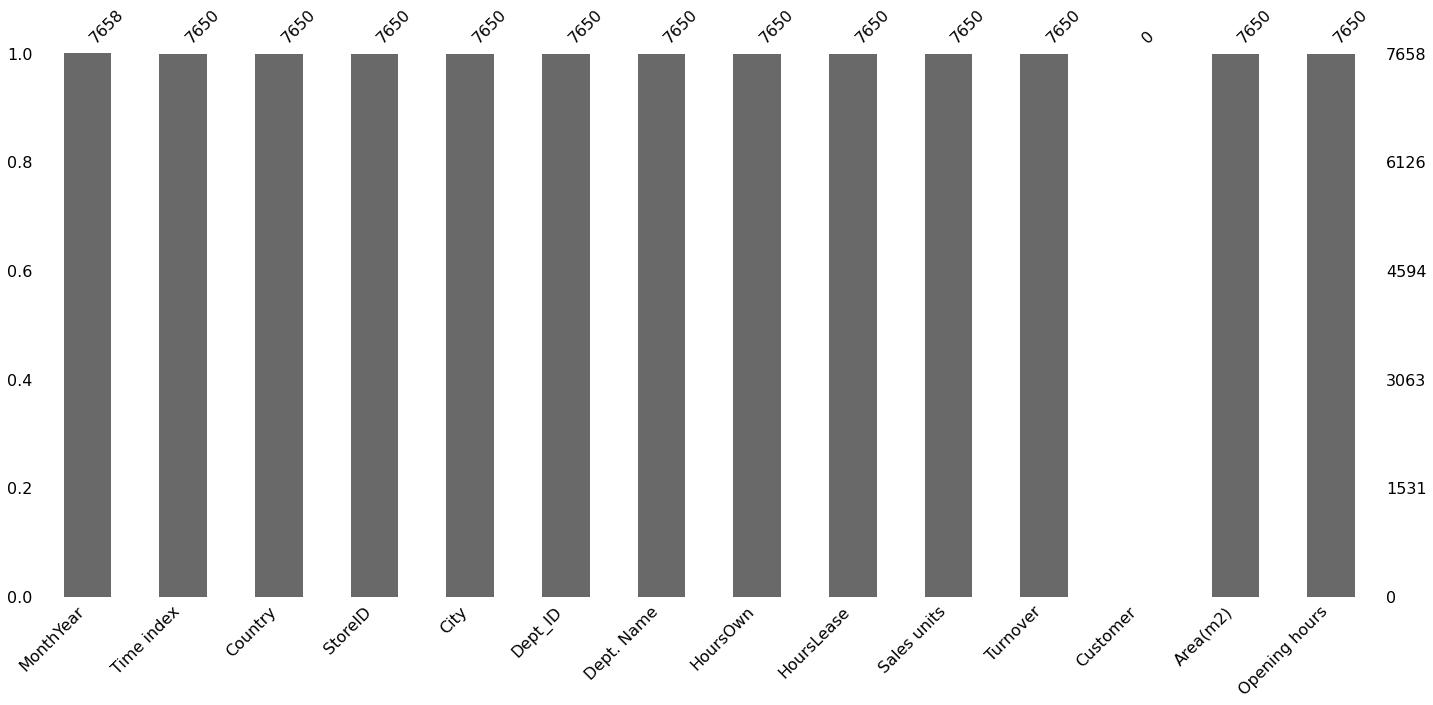

In [24]:
msno.bar(df)
#glance of the data

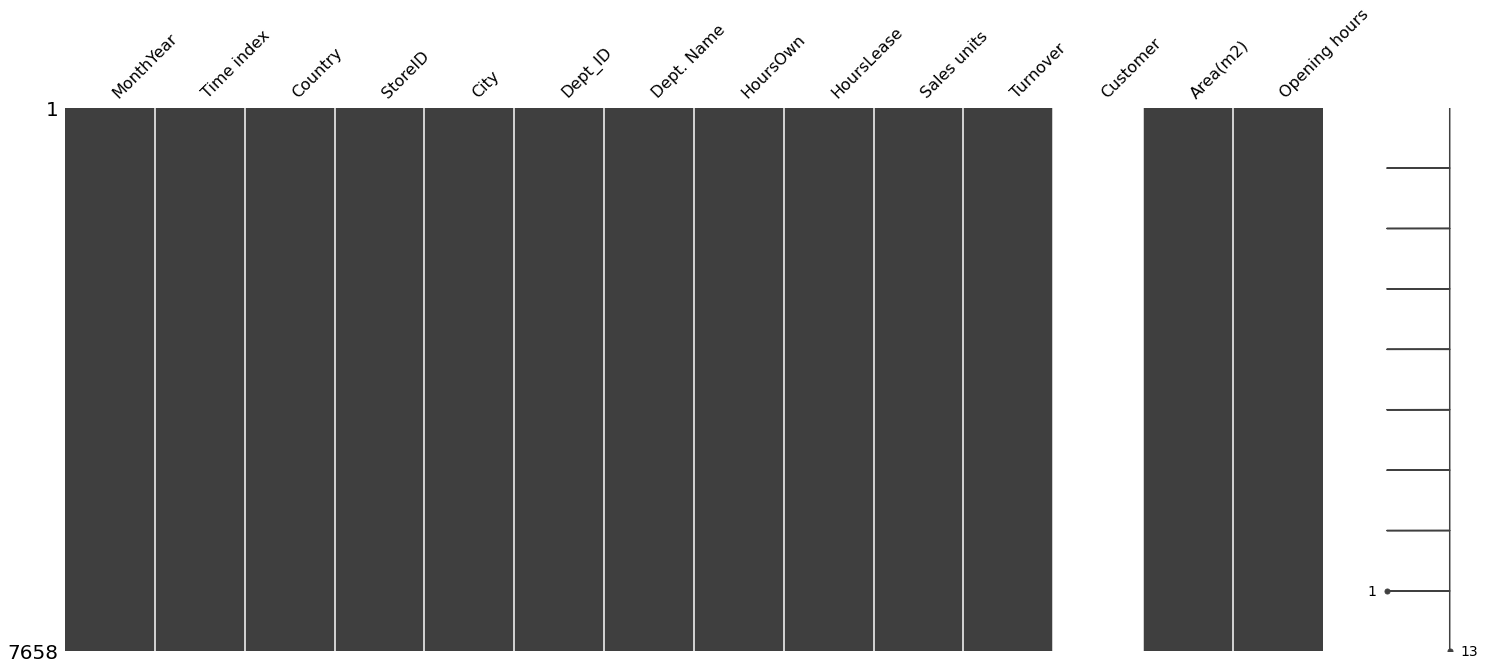

In [25]:
#matrix form
msno.matrix(df)

you can see that customer column is empty column






In [26]:
#dropping the customer column
df=df.drop('Customer',axis=1)

In [28]:
df['MonthYear'].unique()
#check the unique values 

array(['10.2016', ' - - - - ', '11.2016', '12.2016', '01.2017', '02.2017',
       '03.2017', '04.2017', '05.2017', '06.2017'], dtype=object)

we can see that there is '----' unique value 

In [29]:
df['MonthYear'] = df['MonthYear'].apply(lambda x: x.replace('.','-'))
# month year column with '-' in between

In [31]:
df.head(2)
#check wheather it is '.' is changed  to '-'

,MonthYear,Time index,Country,StoreID,City,Dept_ID,Dept. Name,HoursOwn,HoursLease,Sales units,Turnover,Area(m2),Opening hours
0,10-2016,1,United Kingdom,88253,London (I),1,Dry,3184.76,0,398560,1226244,953.04,Type A
1,10-2016,1,United Kingdom,88253,London (I),2,Frozen,1582.94,0,82725,387810,720.48,Type A


In [32]:
df['MonthYear'] = df['MonthYear'].apply(lambda x: x.replace(' - - - - ','Nan'))
#replacing the '- - - - ' with Nan 

In [33]:
df=df.dropna()
#droping month year having 8 values which are in format of '- - - -'

In [34]:
#check the shape now
df.shape

(7650, 13)

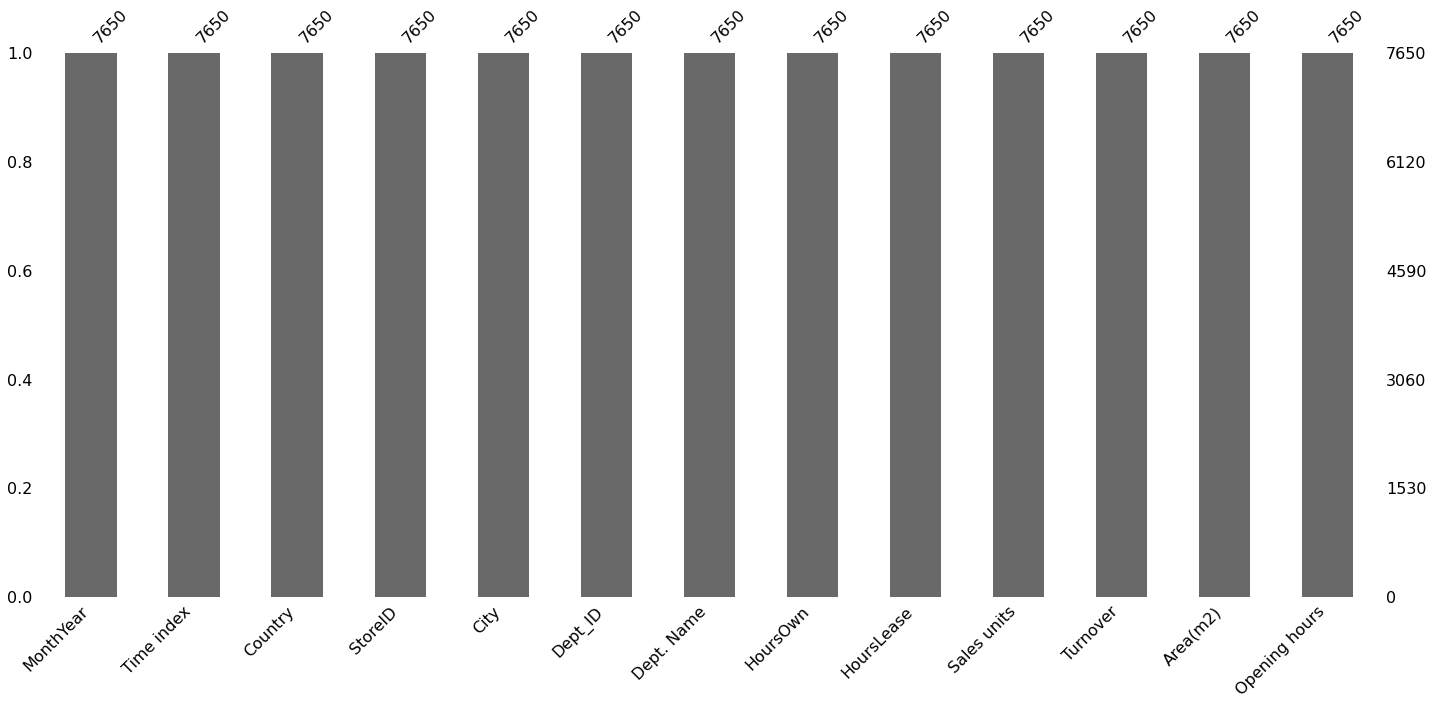

In [35]:
msno.bar(df)
#now visulize the data frame

In [36]:
df['MonthYear'].unique()#we have dropped the unique value  i.e is '- - - -'

array(['10-2016', '11-2016', '12-2016', '01-2017', '02-2017', '03-2017',
       '04-2017', '05-2017', '06-2017'], dtype=object)

In [37]:
from datetime import datetime 

df['MonthYear'] = [datetime.strptime(s, '%m-%Y') for s in df['MonthYear']]

#convert month year column to data and time format 

In [38]:
def add_features(df):
    df['year'] = df['MonthYear'].dt.year
    df['month'] = df['MonthYear'].dt.month
#call the function and create the 2 columns i.e year and month

In [39]:
add_features(df)
#assign it to the function

# **Check if the data types are as expected**

In [42]:
#check the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7650 entries, 0 to 7657
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   MonthYear      7650 non-null   datetime64[ns]
 1   Time index     7650 non-null   object        
 2   Country        7650 non-null   object        
 3   StoreID        7650 non-null   object        
 4   City           7650 non-null   object        
 5   Dept_ID        7650 non-null   object        
 6   Dept. Name     7650 non-null   object        
 7   HoursOwn       7650 non-null   object        
 8   HoursLease     7650 non-null   object        
 9   Sales units    7650 non-null   object        
 10  Turnover       7650 non-null   object        
 11  Area(m2)       7650 non-null   object        
 12  Opening hours  7650 non-null   object        
 13  year           7650 non-null   int64         
 14  month          7650 non-null   int64         
dtypes: datetime64[ns](1),

month year is changed to date and time format and hence by adding the new two columns i.e year and month

In [43]:
#refrence for columns
df.head(2)

,MonthYear,Time index,Country,StoreID,City,Dept_ID,Dept. Name,HoursOwn,HoursLease,Sales units,Turnover,Area(m2),Opening hours,year,month
0,2016-10-01,1,United Kingdom,88253,London (I),1,Dry,3184.76,0,398560,1226244,953.04,Type A,2016,10
1,2016-10-01,1,United Kingdom,88253,London (I),2,Frozen,1582.94,0,82725,387810,720.48,Type A,2016,10


In [44]:
df['Time index']=df['Time index'].astype(int)
#changing the dtype to int

In [45]:
df['Country'].unique()
#check the unique values

array(['United Kingdom', 'Poland', 'The Netherlands', 'Czech Republic',
       'Denmark', 'Spain', 'Italy', 'Germany', 'France', 'Belgium',
       'Sweden'], dtype=object)

In [46]:
df['StoreID'].unique()
#check the unique values

array([88253, 38976, 17647, 22117, 73949, 18808, 71991, 86208, 23623,
       19769, 15552, 95434, 93033, 85321, 38560, 20891, 45583, 85696,
       32949, 96857, 87703, 19000, 88994, 20166, 16927, 96493, 88750,
       78450, 94153, 64983, 77348, 78325, 83160, 12227, 94882, 34378,
       42367, 86089, 98422, 79785, 63354, 85124, 73422, 91973, 19340,
       76852, 73762, 81473, 90992, 29650], dtype=object)

In [47]:
df['City'].unique()
#check the unique values

array(['London (I)', 'Manchester', 'Liverpool', 'Birmingham', 'Leicester',
       'London (II)', 'Warsaw (I)', 'Warsaw (II)', 'Poznan', 'Krakow',
       'Amsterdam', 'Den Haag', 'Rotterdam', 'Groningen', 'Prague (I)',
       'Brno', 'Ostrava', 'Prague (II)', 'Copenhagen (I)',
       'Copenhagen (II)', 'Aalborg (I)', 'Aalborg (II)', 'Madrid (I)',
       'Madrid (II)', 'Barcelona (I)', 'Barcelona (II)', 'Bilbao',
       'Rome (I)', 'Rome (II)', 'Milano', 'Bologna', 'Napoli',
       'Berlin (I)', 'Berlin (II)', 'Munich', 'Hamburg', 'Frankfurt',
       'Cologne', 'Paris (I)', 'Paris (II)', 'Marseille', 'Lyon',
       'Bordeaux', 'Nantes', 'Brussels (I)', 'Brussels (II)', 'Antwerp',
       'Stockholm', 'Malmö', 'Gothenburg'], dtype=object)

In [48]:
df['Dept_ID'].unique()
#check the unique values 

array([1, 2, 3, 4, 5, 6, 13, 7, 8, 9, 14, 15, 12, 16, 11, 17, 18],
      dtype=object)

In [49]:
df['Dept_ID']=df['Dept_ID'].astype(int)
#change the dtype to int

In [51]:
df['Dept. Name'].unique()
#check the unique values

array(['Dry', 'Frozen', 'other', 'Fish', 'Fruits & Vegetables', 'Meat',
       'Food', 'Clothing', 'Household', 'Hardware', 'Non Food', 'Admin',
       'Checkout', 'Customer Services', 'Delivery', 'others', 'all'],
      dtype=object)

In [52]:
df['HoursOwn'].unique()
#check the unique values 

array([3184.764, 1582.941, 47.205, ..., 40133.691, 16902.537, 39652.2],
      dtype=object)

In [53]:
df_notnum = df[['HoursOwn']].applymap(np.isreal).values
df[~df_notnum][['Dept_ID', 'HoursOwn']]
#check for any values which are not numbers

,Dept_ID,HoursOwn
2966,6,?
5889,2,?


There are  values in hours own so remove them or drop them.

In [54]:
df=df.drop(index=2966,axis=0)
df=df.drop(index=5889,axis=0)
#dropping the 2 rows which is having the ? values 

In [55]:
df.shape
#droping the middle row has changed the index so we need to reset again

(7648, 15)

In [56]:
df.reset_index(inplace = True)
#reseting the index agian 

In [57]:
df.head(2)
#look of data frame

,index,MonthYear,Time index,Country,StoreID,City,Dept_ID,Dept. Name,HoursOwn,HoursLease,Sales units,Turnover,Area(m2),Opening hours,year,month
0,0,2016-10-01,1,United Kingdom,88253,London (I),1,Dry,3184.76,0,398560,1226244,953.04,Type A,2016,10
1,1,2016-10-01,1,United Kingdom,88253,London (I),2,Frozen,1582.94,0,82725,387810,720.48,Type A,2016,10


In [58]:
df=df.drop(['index'],axis=1)
#dropping the index column

In [60]:
#look at data frame after droping the index
df.head(2)

,MonthYear,Time index,Country,StoreID,City,Dept_ID,Dept. Name,HoursOwn,HoursLease,Sales units,Turnover,Area(m2),Opening hours,year,month
0,2016-10-01,1,United Kingdom,88253,London (I),1,Dry,3184.76,0,398560,1226244,953.04,Type A,2016,10
1,2016-10-01,1,United Kingdom,88253,London (I),2,Frozen,1582.94,0,82725,387810,720.48,Type A,2016,10


In [61]:
df.shape
#shape of the data 

(7648, 15)

In [62]:
df['HoursOwn']=df['HoursOwn'].astype(int)
#now change the dtype  to int 

In [63]:
df['HoursLease'].unique()
#check the unique values 

array([0, 184, 210, 758, 1152, 660, 84, 1896, 324, 186, 510, 246, 200,
       214, 124, 538, 130, 228, 132, 274, 406, 902, 172, 368, 472, 162,
       360, 522, 122, 280, 46, 316, 764, 410, 258, 68, 242, 568, 198, 208,
       810, 1180, 320, 300, 620, 264, 2064, 118, 376, 292, 182, 1068,
       1542, 616, 140, 16, 2314, 266, 138, 404, 76, 216, 40, 312, 672,
       322, 102, 48, 170, 294, 996, 32, 104, 326, 430, 434, 494, 1358, 58,
       504, 290, 80, 232, 454, 296, 194, 1028, 562, 50, 550, 600, 42, 252,
       894, 190, 622, 116, 110, 1042, 1890, 248, 298, 546, 226, 2988, 64,
       254, 1046, 1440, 2188, 120, 166, 286, 176, 754, 1172, 238, 1410,
       86, 180, 98, 1122, 250, 128, 74, 96, 82, 178, 690, 222, 496, 790,
       602, 308, 1700, 506, 60, 566, 626, 156, 188, 786, 144, 192, 1204,
       152, 662, 72, 734, 370, 428, 154, 112, 1850, 2374, 234, 212, 446,
       260, 624, 3984, 10, 580, 1000, 1220, 442, 342, 158, 352, 480, 28,
       392, 150, 136, 78, 586, 44, 486, 14, 564, 334,

In [64]:
df['HoursLease']=df['HoursLease'].astype(int)
#change the dtype to int 

In [65]:
df['Sales units'].unique()
#check the unique values 

array([398560, 82725, 438400, ..., 71105, 312850, 3886530], dtype=object)

In [66]:
df['Sales units']=df['Sales units'].astype(int)
#change the dtype to int

In [67]:
df['Turnover'].unique()
#check the unique values

array([1226244, 387810, 654657, ..., 2855895, 14538825, 15056214],
      dtype=object)

In [68]:
df['Turnover']=df['Turnover'].astype(int)
#change the dtype to int

In [69]:
df['Area(m2)'].unique()#we have 850 rows that are recored as #NV

array([953.04, 720.48, 966.72, ..., 13641.24, 31308.96, '#NV'],
      dtype=object)

In [70]:
df_notnum1 = df[['Area(m2)']].applymap(np.isreal).values
df[~df_notnum1][['Country','Dept. Name','month','year','Area(m2)']]
#the month of June 2017 does not contain any information about the sales area

,Country,Dept. Name,month,year,Area(m2)
6798,United Kingdom,Dry,6,2017,#NV
6799,United Kingdom,Frozen,6,2017,#NV
6800,United Kingdom,other,6,2017,#NV
6801,United Kingdom,Fish,6,2017,#NV
6802,United Kingdom,Fruits & Vegetables,6,2017,#NV
...,...,...,...,...,...
7643,Sweden,Checkout,6,2017,#NV
7644,Sweden,Customer Services,6,2017,#NV
7645,Sweden,Delivery,6,2017,#NV
7646,Sweden,others,6,2017,#NV


There is 12% of data no recorded in the area column and i.e 850 rows are empty (NO VALUE)

In [71]:
df=df.drop('Area(m2)',axis=1)
#dropping the column because of 12% no value 

In [73]:
#glance of dataset after droping the column
df.head(2)

,MonthYear,Time index,Country,StoreID,City,Dept_ID,Dept. Name,HoursOwn,HoursLease,Sales units,Turnover,Opening hours,year,month
0,2016-10-01,1,United Kingdom,88253,London (I),1,Dry,3184,0,398560,1226244,Type A,2016,10
1,2016-10-01,1,United Kingdom,88253,London (I),2,Frozen,1582,0,82725,387810,Type A,2016,10


In [74]:
len(df.columns)
#length of data frame after droping

14

In [75]:
df['Opening hours'].unique()
#checking the unique values 

array(['Type A', 'Type B', 'Type C'], dtype=object)

In [76]:
df.info()
#check if you have now expected dat types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7648 entries, 0 to 7647
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   MonthYear      7648 non-null   datetime64[ns]
 1   Time index     7648 non-null   int64         
 2   Country        7648 non-null   object        
 3   StoreID        7648 non-null   object        
 4   City           7648 non-null   object        
 5   Dept_ID        7648 non-null   int64         
 6   Dept. Name     7648 non-null   object        
 7   HoursOwn       7648 non-null   int64         
 8   HoursLease     7648 non-null   int64         
 9   Sales units    7648 non-null   int64         
 10  Turnover       7648 non-null   int64         
 11  Opening hours  7648 non-null   object        
 12  year           7648 non-null   int64         
 13  month          7648 non-null   int64         
dtypes: datetime64[ns](1), int64(8), object(5)
memory usage: 836.6+ KB


In [78]:
#columns after data cleaning
df.columns

Index(['MonthYear', 'Time index', 'Country', 'StoreID', 'City', 'Dept_ID',
       'Dept. Name', 'HoursOwn', 'HoursLease', 'Sales units', 'Turnover',
       'Opening hours', 'year', 'month'],
      dtype='object')

# ***Visulization & interpretation***

In [80]:
fig=px.line(df, x="MonthYear", y='Sales units', color="Dept. Name",hover_name="Country",
            line_shape="spline", render_mode="svg",template="plotly_dark",title='Trend of No. of sales units sold for departments of retailer and their countries')
fig.show()

spline it is commonly used to emphasize trends in data over equal time intervals,svg for Scalable Vector Graphics
# No .of sales units sold  as per departments and their country and how the trend is following for every month 

In [82]:
fig = px.area(df, x="MonthYear", y="Sales units", color="Country", line_group="City",template="plotly_dark",title='No. of sales units sold for different countries')
fig.show()

#No.of sales units sold  as per country and its trend with month by month from oct 2016 to jun 2017

In [83]:
df['Dept. Name'].unique()
#unique values 

array(['Dry', 'Frozen', 'other', 'Fish', 'Fruits & Vegetables', 'Meat',
       'Food', 'Clothing', 'Household', 'Hardware', 'Non Food', 'Admin',
       'Checkout', 'Customer Services', 'Delivery', 'others', 'all'],
      dtype=object)

# **Grouping department name and getting some insight.**

In [84]:
dept_name=df.groupby('Dept. Name')
#grouping the departname

In [85]:
len(dept_name)
#length of department name

17

In [86]:
dept_name.size()
#size of each departname

Dept. Name
Admin                  450
Checkout               450
Clothing               450
Customer Services      450
Delivery               450
Dry                    450
Fish                   450
Food                   450
Frozen                 449
Fruits & Vegetables    450
Hardware               450
Household              450
Meat                   449
Non Food               450
all                    450
other                  450
others                 450
dtype: int64

# **DATA MINING**

# **Collecting data for department retailer name and sum of thier working hours irrespective of country.**

In [87]:
admin=dept_name.get_group('Admin')['HoursOwn'].sum()
checkout=dept_name.get_group('Checkout')['HoursOwn'].sum()
clothing=dept_name.get_group('Clothing')['HoursOwn'].sum()
cust_service=dept_name.get_group('Customer Services')['HoursOwn'].sum()
delivery=dept_name.get_group('Delivery')['HoursOwn'].sum()
dry=dept_name.get_group('Dry')['HoursOwn'].sum()
fish=dept_name.get_group('Fish')['HoursOwn'].sum()
food=dept_name.get_group('Food')['HoursOwn'].sum()
frozen=dept_name.get_group('Frozen')['HoursOwn'].sum()
fruitsveg=dept_name.get_group('Fruits & Vegetables')['HoursOwn'].sum()
hardware=dept_name.get_group('Hardware')['HoursOwn'].sum()
household=dept_name.get_group('Household')['HoursOwn'].sum()
meat=dept_name.get_group('Meat')['HoursOwn'].sum()
nonfood=dept_name.get_group('Non Food')['HoursOwn'].sum()
All=dept_name.get_group('all')['HoursOwn'].sum()
other=dept_name.get_group('other')['HoursOwn'].sum()
others=dept_name.get_group('others')['HoursOwn'].sum()
#sum of all hours own with different retail department

In [88]:
barofhours=[admin,checkout,clothing,cust_service,delivery,dry,fish,food,frozen,fruitsveg,hardware,household,
            meat,nonfood,All,other,others]
#will see the bar graph for hours own 

In [82]:
barofhours#values after sum

[2033728,
 3475537,
 2549057,
 1523562,
 1130302,
 1479022,
 867401,
 9406815,
 1088987,
 1438809,
 968368,
 840744,
 4497966,
 4358632,
 22651001,
 21150,
 721191]

In [103]:
dept= ['admin','checkout','clothing','cust_service','delivery','dry','fish','food','frozen','fruitsveg','hardware','household',
            'meat','nonfood','All','other','others']
#department names

<Figure size 720x432 with 0 Axes>

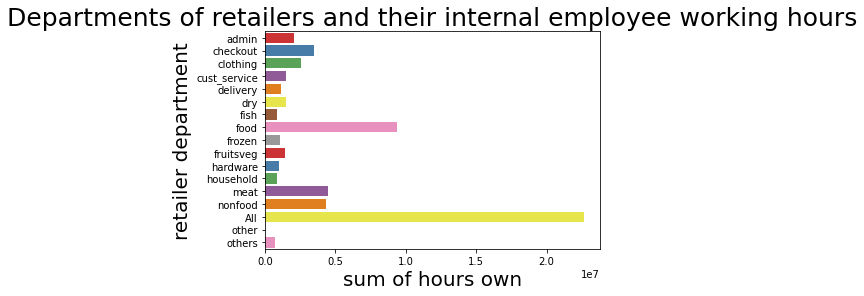

<Figure size 720x432 with 0 Axes>

In [115]:
sns.barplot(x=barofhours,y=dept,palette="Set1")#barplot 
plt.xlabel('sum of hours own',size=20)#name of xlabel
plt.ylabel('retailer department',size=20)#name of ylabel
plt.title('Departments of retailers and their internal employee working hours',size=25)#title
plt.figure(figsize=(10,6))#figure size


#working hours of internal employees are more for department : all , followed by department :food , department :meat , department :nonfood

# **collecting data for No.of sales units sold in department having higest working internal employee hours**

In [108]:
salesall=dept_name.get_group('all')['Sales units'].sum()
salesfood=dept_name.get_group('Food')['Sales units'].sum()
salesmeat=dept_name.get_group('Meat')['Sales units'].sum()
salesnonfood=dept_name.get_group('Non Food')['Sales units'].sum()
barofsales=[salesall,salesfood,salesmeat,salesnonfood]
#sum of all the sales for departments having highest working intenal employee hours

In [109]:
barofsales #no.of sales sold

[2027891100, 1855401225, 918049745, 172489875]

In [112]:
dept1=['all','food','meat','non food']

<Figure size 720x432 with 0 Axes>

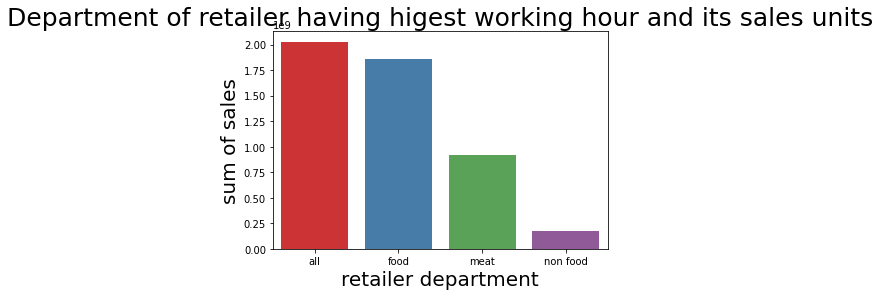

<Figure size 720x432 with 0 Axes>

In [113]:
sns.barplot(x=dept1,y=barofsales,palette="Set1")#barplot 
plt.xlabel('retailer department',size=20)#name of xlabel
plt.ylabel('sum of sales',size=20)#name of ylabel
plt.title('Department of retailer having higest working hour and its sales units',size=25)#title
plt.figure(figsize=(10,6))#figure size


#more  internal employees working hours  then more No.of sales units sold; No.of sales sold as per higest working hours departments.

In [116]:
df.columns
#show the columns

Index(['MonthYear', 'Time index', 'Country', 'StoreID', 'City', 'Dept_ID',
       'Dept. Name', 'HoursOwn', 'HoursLease', 'Sales units', 'Turnover',
       'Opening hours', 'year', 'month'],
      dtype='object')

In [117]:
df.head(2)#show the top 2 rows of data

,MonthYear,Time index,Country,StoreID,City,Dept_ID,Dept. Name,HoursOwn,HoursLease,Sales units,Turnover,Opening hours,year,month
0,2016-10-01,1,United Kingdom,88253,London (I),1,Dry,3184,0,398560,1226244,Type A,2016,10
1,2016-10-01,1,United Kingdom,88253,London (I),2,Frozen,1582,0,82725,387810,Type A,2016,10


# **checking which country has higest turnover with respect to opening hour schemes**

In [118]:
fig = px.bar(df, x="Country", y="Turnover", color="Opening hours",barmode='group',template="plotly_dark",title='Financial Turnover for countries having opening hour scheme')
fig.show()

#Financial turnover, for each and every country when there are opening hour schemes and here we can see germany has got the higest Financial turnover when we have type A scheme and italy is only country which is making use of all three opening hour schemes.

In [119]:
fig = px.pie(df, names="Country", values="Sales units", color="City",template="plotly_dark",title='Country and respective city Sales units sold')
fig.show()


#Berlin is the city and Germany is the Country where there are more no of Sales units sold irrespective of opening hours.

In [120]:
fig = px.pie(df, names="Country", values="Turnover", color="City",template="plotly_dark",title='Turn over with respect to Country and city')
fig.show()

# Highest Turn over city is  berlin in germany and lowest turn over city is warsaw in poland.

In [122]:
df.info()#check the data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7648 entries, 0 to 7647
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   MonthYear      7648 non-null   datetime64[ns]
 1   Time index     7648 non-null   int64         
 2   Country        7648 non-null   object        
 3   StoreID        7648 non-null   object        
 4   City           7648 non-null   object        
 5   Dept_ID        7648 non-null   int64         
 6   Dept. Name     7648 non-null   object        
 7   HoursOwn       7648 non-null   int64         
 8   HoursLease     7648 non-null   int64         
 9   Sales units    7648 non-null   int64         
 10  Turnover       7648 non-null   int64         
 11  Opening hours  7648 non-null   object        
 12  year           7648 non-null   int64         
 13  month          7648 non-null   int64         
dtypes: datetime64[ns](1), int64(8), object(5)
memory usage: 836.6+ KB


In [123]:
fig = px.bar(df, x="Country", y="Sales units", color="Dept. Name",barmode='group',template="plotly_dark",title='highest sales units  sold respect to country and Retailer department')
fig.show()

#Food , ALL is the Departments in germany Having more  Sales units Sold .

In [124]:
fig=px.pie(df,values='Sales units',names='Country',title='No.of Sales units sold as per country',template="plotly_dark")
fig.show()

# we have more No.of sales sold in germany and as follows ...

In [125]:
fig=px.bar(df,x='Opening hours',y='Sales units',color='Dept. Name',barmode='group',template="plotly_dark",title='No.of Sales units sold for departments and opening hour scheme')
fig.show()

# we can see that opening hour type A scheme is having more impact for trend towards No of sales units with all different departments.

In [126]:
fig = px.bar(df, x="Dept. Name", y="HoursLease", color="Country",barmode='group',template="plotly_dark",title='Country and Department name  for Working hours of external employees')
fig.show()

# country uk for department all  and country france for department all having more working hours of external employees .

In [127]:
df['month'].unique()
#unique values in month

array([10, 11, 12,  1,  2,  3,  4,  5,  6])

In [128]:
df.head(2)#view top 2 rows

,MonthYear,Time index,Country,StoreID,City,Dept_ID,Dept. Name,HoursOwn,HoursLease,Sales units,Turnover,Opening hours,year,month
0,2016-10-01,1,United Kingdom,88253,London (I),1,Dry,3184,0,398560,1226244,Type A,2016,10
1,2016-10-01,1,United Kingdom,88253,London (I),2,Frozen,1582,0,82725,387810,Type A,2016,10


#**In 2016 we have more turn over so having a glance at which country is having higest turnover with respect to opening hour schemes**

In [129]:
fig=px.scatter(df.query('month==12'),x="Turnover",y="Country",color='Opening hours',template="plotly_dark",
               title='Dec -2016 having higest Financial turnover',size_max=10)
fig.show()

#Country sweden has more participation in increase of Turnover in December-2016 
#And Country is making use of Type a opening hour higest turn over is in Dec 2016.

In [130]:
fig = px.scatter(df, x='HoursOwn', y='Turnover', size="Sales units", color="Opening hours",
           hover_name="Country", size_max=10,template="plotly_dark",title='Working hours of internal employee VS Financial turnover')
fig.show()

#As working hours of intrenal employee increases then Financial turnover increases
#there is positive impact on Turn over when working hour increases.

In [131]:
fig = px.scatter(df, x='Sales units', y='Turnover', color="Opening hours",
           hover_name="Country", size_max=10,template="plotly_dark",title='Number of sales units sold VS Financial turnover')
fig.show()

#As long as number of sales unit increases Financial Turnover increases
#There is a linear relationship between them.

# **Data preprocessing for required columns**

In [132]:
df.head(2)#show the top 2 rows od data

,MonthYear,Time index,Country,StoreID,City,Dept_ID,Dept. Name,HoursOwn,HoursLease,Sales units,Turnover,Opening hours,year,month
0,2016-10-01,1,United Kingdom,88253,London (I),1,Dry,3184,0,398560,1226244,Type A,2016,10
1,2016-10-01,1,United Kingdom,88253,London (I),2,Frozen,1582,0,82725,387810,Type A,2016,10


In [133]:
df.info()#see weather which column is required for label encoding

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7648 entries, 0 to 7647
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   MonthYear      7648 non-null   datetime64[ns]
 1   Time index     7648 non-null   int64         
 2   Country        7648 non-null   object        
 3   StoreID        7648 non-null   object        
 4   City           7648 non-null   object        
 5   Dept_ID        7648 non-null   int64         
 6   Dept. Name     7648 non-null   object        
 7   HoursOwn       7648 non-null   int64         
 8   HoursLease     7648 non-null   int64         
 9   Sales units    7648 non-null   int64         
 10  Turnover       7648 non-null   int64         
 11  Opening hours  7648 non-null   object        
 12  year           7648 non-null   int64         
 13  month          7648 non-null   int64         
dtypes: datetime64[ns](1), int64(8), object(5)
memory usage: 836.6+ KB


In [134]:
df['City'].unique()#unique values

array(['London (I)', 'Manchester', 'Liverpool', 'Birmingham', 'Leicester',
       'London (II)', 'Warsaw (I)', 'Warsaw (II)', 'Poznan', 'Krakow',
       'Amsterdam', 'Den Haag', 'Rotterdam', 'Groningen', 'Prague (I)',
       'Brno', 'Ostrava', 'Prague (II)', 'Copenhagen (I)',
       'Copenhagen (II)', 'Aalborg (I)', 'Aalborg (II)', 'Madrid (I)',
       'Madrid (II)', 'Barcelona (I)', 'Barcelona (II)', 'Bilbao',
       'Rome (I)', 'Rome (II)', 'Milano', 'Bologna', 'Napoli',
       'Berlin (I)', 'Berlin (II)', 'Munich', 'Hamburg', 'Frankfurt',
       'Cologne', 'Paris (I)', 'Paris (II)', 'Marseille', 'Lyon',
       'Bordeaux', 'Nantes', 'Brussels (I)', 'Brussels (II)', 'Antwerp',
       'Stockholm', 'Malmö', 'Gothenburg'], dtype=object)

# **import module for label encoding**

In [135]:
from sklearn.preprocessing import LabelEncoder#module for encode the catagory

In [136]:
df.columns#show columns

Index(['MonthYear', 'Time index', 'Country', 'StoreID', 'City', 'Dept_ID',
       'Dept. Name', 'HoursOwn', 'HoursLease', 'Sales units', 'Turnover',
       'Opening hours', 'year', 'month'],
      dtype='object')

In [137]:
le_country=LabelEncoder()
le_storeid=LabelEncoder()
le_city=LabelEncoder()
le_deptname=LabelEncoder()
le_openinghours=LabelEncoder()

#assign label encoder to new variables to use them to convert the columns

In [138]:
df['mod_country']=le_country.fit_transform(df['Country'])
df['mod_storeid']=le_storeid.fit_transform(df['StoreID'])
df['mod_city']=le_city.fit_transform(df['City'])
df['mod_deptname']=le_deptname.fit_transform(df['Dept. Name'])
df['mod_openinghours']=le_openinghours.fit_transform(df['Opening hours'])

#changing the object to numerical catagory

In [139]:
df.head(2)#check weather it is changed and added in data frame

,MonthYear,Time index,Country,StoreID,City,Dept_ID,Dept. Name,HoursOwn,HoursLease,Sales units,Turnover,Opening hours,year,month,mod_country,mod_storeid,mod_city,mod_deptname,mod_openinghours
0,2016-10-01,1,United Kingdom,88253,London (I),1,Dry,3184,0,398560,1226244,Type A,2016,10,10,38,26,5,0
1,2016-10-01,1,United Kingdom,88253,London (I),2,Frozen,1582,0,82725,387810,Type A,2016,10,10,38,26,8,0


In [140]:
df['mod_country'].unique()#unique values in modified country

array([10,  6,  9,  1,  2,  7,  5,  4,  3,  0,  8])

# **feature selection technique.**

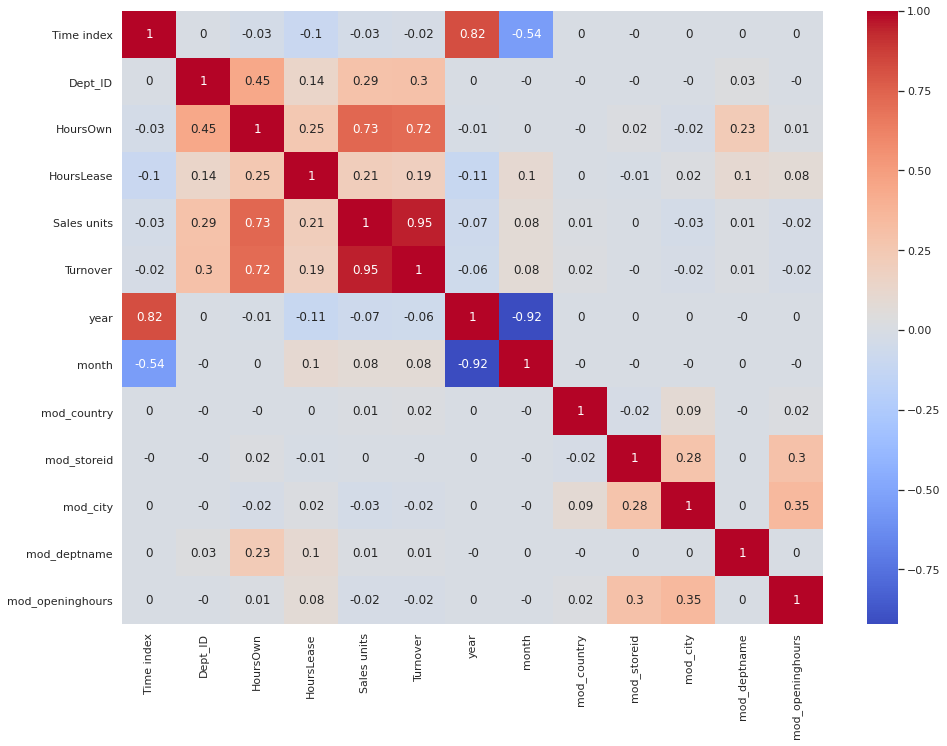

In [141]:
corelmatrix=df.corr().round(2)
sns.set(rc={'figure.figsize':(15.7,11.27)})
sns.heatmap(data=corelmatrix,annot=True,cmap="coolwarm")

In [142]:
fig = px.box(df, x="Country",y="Sales units", color="Opening hours", notched=True,template="plotly_dark",title='Extreme values for No.of sales units sold with country and opening hour scheme')
fig.show()

#There are extreme values in the NO.of sales units sold  so bascially to predict the accurate no .of  sales we need to go with average no of sales sold. 

In [147]:
px.bar(df,x='MonthYear',y="Sales units",template="plotly_dark",title='Higher values for NO.of sales units sold ')


#We need to get average values for No.of sales unit sold to predict the accurate sales .

In [148]:
df.head(2)#show the top 2 rows

,MonthYear,Time index,Country,StoreID,City,Dept_ID,Dept. Name,HoursOwn,HoursLease,Sales units,Turnover,Opening hours,year,month,mod_country,mod_storeid,mod_city,mod_deptname,mod_openinghours
0,2016-10-01,1,United Kingdom,88253,London (I),1,Dry,3184,0,398560,1226244,Type A,2016,10,10,38,26,5,0
1,2016-10-01,1,United Kingdom,88253,London (I),2,Frozen,1582,0,82725,387810,Type A,2016,10,10,38,26,8,0


In [149]:
df.shape#shape of data frame

(7648, 19)

# **Detect the outliers**

In [150]:
Q1 = df['Sales units'].quantile(0.25)
Q3 = df['Sales units'].quantile(0.75)
Q1, Q3
#select the lower limit and upper limit values 

(54553.75, 916432.5)

In [151]:
IQR = Q3 - Q1
IQR
#Inter quartile range value

861878.75

In [152]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit
#substitute in the formulae to remove the outliers

(-1238264.375, 2209250.625)

# **Here,are outliers ; data after removing outliers .**

In [153]:
df_no_outlier = df[(df['Sales units']>lower_limit)&(df['Sales units']<upper_limit)]
df_no_outlier

,MonthYear,Time index,Country,StoreID,City,Dept_ID,Dept. Name,HoursOwn,HoursLease,Sales units,Turnover,Opening hours,year,month,mod_country,mod_storeid,mod_city,mod_deptname,mod_openinghours
0,2016-10-01,1,United Kingdom,88253,London (I),1,Dry,3184,0,398560,1226244,Type A,2016,10,10,38,26,5,0
1,2016-10-01,1,United Kingdom,88253,London (I),2,Frozen,1582,0,82725,387810,Type A,2016,10,10,38,26,8,0
2,2016-10-01,1,United Kingdom,88253,London (I),3,other,47,0,438400,654657,Type A,2016,10,10,38,26,15,0
3,2016-10-01,1,United Kingdom,88253,London (I),4,Fish,1623,0,309425,499434,Type A,2016,10,10,38,26,6,0
4,2016-10-01,1,United Kingdom,88253,London (I),5,Fruits & Vegetables,1759,0,165515,329397,Type A,2016,10,10,38,26,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7641,2017-06-01,9,Sweden,29650,Gothenburg,14,Non Food,6498,0,312850,2855895,Type A,2017,6,8,12,20,13,0
7642,2017-06-01,9,Sweden,29650,Gothenburg,15,Admin,3433,0,245,0,Type A,2017,6,8,12,20,0,0
7644,2017-06-01,9,Sweden,29650,Gothenburg,16,Customer Services,4270,0,245,0,Type A,2017,6,8,12,20,3,0
7645,2017-06-01,9,Sweden,29650,Gothenburg,11,Delivery,0,0,0,0,Type A,2017,6,8,12,20,4,0


In [154]:
df_no_outlier.shape #shape of the data after removing the outliers

(6182, 19)

In [155]:
df_no_outlier.info()
#data types after remove the outliers

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6182 entries, 0 to 7646
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   MonthYear         6182 non-null   datetime64[ns]
 1   Time index        6182 non-null   int64         
 2   Country           6182 non-null   object        
 3   StoreID           6182 non-null   object        
 4   City              6182 non-null   object        
 5   Dept_ID           6182 non-null   int64         
 6   Dept. Name        6182 non-null   object        
 7   HoursOwn          6182 non-null   int64         
 8   HoursLease        6182 non-null   int64         
 9   Sales units       6182 non-null   int64         
 10  Turnover          6182 non-null   int64         
 11  Opening hours     6182 non-null   object        
 12  year              6182 non-null   int64         
 13  month             6182 non-null   int64         
 14  mod_country       6182 n

In [156]:
df_no_outlier.head(2)
#detected outliers top 2 rows

,MonthYear,Time index,Country,StoreID,City,Dept_ID,Dept. Name,HoursOwn,HoursLease,Sales units,Turnover,Opening hours,year,month,mod_country,mod_storeid,mod_city,mod_deptname,mod_openinghours
0,2016-10-01,1,United Kingdom,88253,London (I),1,Dry,3184,0,398560,1226244,Type A,2016,10,10,38,26,5,0
1,2016-10-01,1,United Kingdom,88253,London (I),2,Frozen,1582,0,82725,387810,Type A,2016,10,10,38,26,8,0


# **Check corealation after removing outliers**

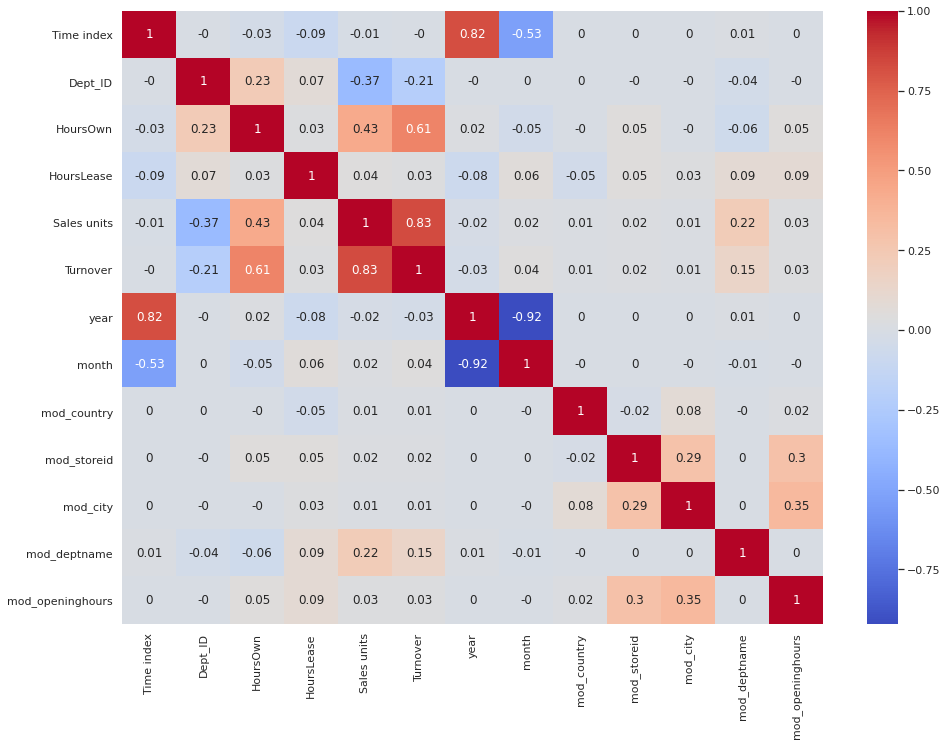

In [157]:
corelmatrix=df_no_outlier.corr().round(2)
sns.set(rc={'figure.figsize':(15.7,11.27)})
sns.heatmap(data=corelmatrix,annot=True,cmap="coolwarm")

# **Store the independent features and target variable .**

In [158]:
x=df_no_outlier[['month','year','mod_country','mod_city','mod_deptname','mod_openinghours','Turnover','HoursOwn',
                'HoursLease',]]
y=df_no_outlier.iloc[:,9]
#store the values in x and y

In [159]:
x#x dataset

,month,year,mod_country,mod_city,mod_deptname,mod_openinghours,Turnover,HoursOwn,HoursLease
0,10,2016,10,26,5,0,1226244,3184,0
1,10,2016,10,26,8,0,387810,1582,0
2,10,2016,10,26,15,0,654657,47,0
3,10,2016,10,26,6,0,499434,1623,0
4,10,2016,10,26,9,0,329397,1759,0
...,...,...,...,...,...,...,...,...,...
7641,6,2017,8,20,13,0,2855895,6498,0
7642,6,2017,8,20,0,0,0,3433,0
7644,6,2017,8,20,3,0,0,4270,0
7645,6,2017,8,20,4,0,0,0,0


In [160]:
y#values in y

0       398560
1        82725
2       438400
3       309425
4       165515
         ...  
7641    312850
7642       245
7644       245
7645         0
7646       245
Name: Sales units, Length: 6182, dtype: int64

In [161]:
x.shape #shape of the data

(6182, 9)

In [162]:
y.shape #shape of y

(6182,)

# **PRE-PROCESSING ,FITTING THE MODELS AND PREDICTIONS .**

# **Machine learning works on magnitude of data so need to convert values to -1 to 1 (pre process using standard scaler )**

In [163]:
standmod=StandardScaler()
#store standard scalar in new variable

In [164]:
standard_data=standmod.fit_transform(x)
#scaling the values 

In [165]:
standard_data
#sacled data

array([[ 1.06458765, -1.43593588,  1.58152772, ...,  0.01594949,
        -0.12437716, -0.15023812],
       [ 1.06458765, -1.43593588,  1.58152772, ..., -0.47462825,
        -0.63667674, -0.15023812],
       [ 1.06458765, -1.43593588,  1.58152772, ..., -0.31849288,
        -1.12755056, -0.15023812],
       ...,
       [ 0.01632088,  0.69640993,  0.92776615, ..., -0.70154051,
         0.22291206, -0.15023812],
       [ 0.01632088,  0.69640993,  0.92776615, ..., -0.70154051,
        -1.14258057, -0.15023812],
       [ 0.01632088,  0.69640993,  0.92776615, ..., -0.70154051,
        -0.43137317, -0.15023812]])

In [166]:
standmod1=StandardScaler()
#store in new variable to scale y values

In [167]:
y = y.values.reshape(-1,1)
#reshape the y into 2 dimension

In [168]:
standard_data1=standmod1.fit_transform(y)
#scale the y values

In [169]:
standard_data1#scaled y values

array([[ 0.18947296],
       [-0.55868301],
       [ 0.28384671],
       ...,
       [-0.7540632 ],
       [-0.75464356],
       [-0.7540632 ]])

# **Splitting the data into train and test with respect to train-size .**

In [170]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(standard_data,standard_data1,train_size=0.80,random_state=42)

In [173]:
x_train.shape#shape of x_train

(4945, 9)

In [172]:
y_train.shape#shape of y-train

(4945, 1)

In [174]:
x_test.shape#shape of x_test 

(1237, 9)

In [175]:
y_test.shape #shape of y_test

(1237, 1)

# **Ml modeling .**

In [176]:
from sklearn.linear_model import LinearRegression
#import linear regression model

# **Multi linear regression**

# **Model 1: Multi regression using pre processed data by standardization**

In [177]:
lrm1=LinearRegression()#model in new variable

In [178]:
lrm1.fit(x_train,y_train)#fit the model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [179]:
lrm1.coef_#slope values for all variables

array([[-0.0487622 , -0.04002215, -0.00251543, -0.00820753,  0.07729574,
         0.0195356 ,  0.88844857, -0.10887075,  0.00138163]])

In [180]:
lrm1.intercept_ #intercept value

array([0.00308485])

# **Predicting the test results.**

In [181]:
y_predict11=lrm1.predict(x_test)#predict the x_test values

In [182]:
correctoutput1 = standmod1.inverse_transform(y_predict11) #inverse transform to get values back in original

In [183]:
correctoutput1 #values in original state

array([[ 211846.60905064],
       [ 757123.48691148],
       [ 370466.56961525],
       ...,
       [2248679.5522531 ],
       [ 524592.71726432],
       [  18570.87495318]])

# **Model1:performance**

In [184]:
from sklearn.metrics import r2_score
r2_score(y_test,y_predict11)

0.7306081072325127

# **Pre-processing using min max scaler**

In [185]:
from sklearn.preprocessing import MinMaxScaler#import the library for preprocessing

In [186]:
scaler=MinMaxScaler()#store in the new variable

In [187]:
rescalex1=scaler.fit_transform(x)#transform the values and store scaled values 

In [188]:
rescalex1.shape#shape of new scaled x

(6182, 9)

In [189]:
rescalex1#new values for independent varaibles 

array([[0.81818182, 0.        , 1.        , ..., 0.09684202, 0.08023587,
        0.        ],
       [0.81818182, 0.        , 1.        , ..., 0.03062711, 0.03986594,
        0.        ],
       [0.81818182, 0.        , 1.        , ..., 0.05170122, 0.00118439,
        0.        ],
       ...,
       [0.45454545, 1.        , 0.8       , ..., 0.        , 0.10760275,
        0.        ],
       [0.45454545, 1.        , 0.8       , ..., 0.        , 0.        ,
        0.        ],
       [0.45454545, 1.        , 0.8       , ..., 0.        , 0.05604415,
        0.        ]])

In [190]:
scaler1 = MinMaxScaler()#store in the new variable for y

In [191]:
rescaley1 = scaler1.fit_transform(y) #scale the values

In [192]:
rescaley1.shape #shape of the new x

(6182, 1)

In [193]:
type(rescaley1) #type of the scaled x

numpy.ndarray

# **Splitting the data into train and test with respect to train_size .**

In [194]:
from sklearn.model_selection import train_test_split#split the data into train and test

In [195]:
x_train,x_test,y_train,y_test=train_test_split(rescalex1,rescaley1,train_size=0.80,random_state=42)
#save the data into new variables for train and test

In [196]:
x_train.shape #x train shape

(4945, 9)

In [197]:
y_train.shape #y train shape

(4945, 1)

In [198]:
x_test.shape #x test shape

(1237, 9)

In [199]:
y_test.shape #y test shape

(1237, 1)

# **ML modeling**

In [200]:
from sklearn.linear_model import LinearRegression
#import the model

# **Multi linear regression**

# **Model 2: mulitiple linear regression using pre processed features by min-max scalar**

In [201]:
lrm=LinearRegression()#model in new variable

In [202]:
lrm.fit(x_train,y_train)#fit the model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [203]:
lrm.coef_#slope of the variables

array([[-0.02694465, -0.01635848, -0.00157611, -0.00533291,  0.04926046,
         0.01519307,  1.26173755, -0.26482679,  0.00847422]])

In [204]:
lrm.intercept_#intercept value

array([0.04926841])

# **Predicting the test set results**

In [205]:
y_predict=lrm.predict(x_test)#predict for x_test values

In [206]:
correctoutput = scaler1.inverse_transform(y_predict)#inverse transform to get new values

In [207]:
correctoutput#original values

array([[ 211846.60905064],
       [ 757123.48691148],
       [ 370466.56961525],
       ...,
       [2248679.5522531 ],
       [ 524592.71726432],
       [  18570.87495318]])

# **model 2: performance**

In [208]:
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)
#model accuracy the higher the R square the better the model

0.7306081072325126

In [209]:
from sklearn.metrics import mean_squared_error
rmse = (np.sqrt(mean_squared_error(y_predict,y_test)))

In [210]:
rmse#the lower the root mean square the better the model

0.09786967844867452

# **Decision tree**

# **model 3 :decision tree regressor using pre processed features by mix-max scalar**

In [211]:
from sklearn.model_selection import train_test_split#split the data

In [212]:
x_train,x_test,y_train,y_test=train_test_split(rescalex1,rescaley1,test_size=0.20,random_state=1)#store the data in new splited variables

# **Training the Decision Tree Regression model on the Training set**

In [213]:
from sklearn.tree import DecisionTreeRegressor
#import the model

In [214]:
regressor=DecisionTreeRegressor(random_state=0)#store the model in new variable

In [215]:
regressor.fit(x_train,y_train)#fit the model

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

# **Predicting the test set results**

In [216]:
y_pred=regressor.predict(x_test)#evaluate the data

# **model 3: performance**

In [217]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.95607246840095

# **Random forest**

# **model 4: random forest regressor using pre processed features by min-max scalar**

In [218]:
from sklearn.model_selection import train_test_split#split the data

In [219]:
x_train,x_test,y_train,y_test=train_test_split(rescalex1,rescaley1,test_size=0.20,random_state=1)

# **Training the Random Forest Regression model on the train dataset**

In [220]:
from sklearn.ensemble import RandomForestRegressor#import the model

In [221]:
regressor1=RandomForestRegressor(n_estimators=10,random_state=0)#create the model

In [222]:
regressor1.fit(x_train,y_train)#fit the model

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

# **Predicting the Test set results**

In [223]:
y_pred1=regressor1.predict(x_test) #predict the x test values

# **model 4: performance**

In [224]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred1)

0.9789311337263322

# **model 5: Hyper parameter tuning for Randomforest regressor having N_ESTIMATORS=30**

In [225]:
regressor2=RandomForestRegressor(n_estimators=30,random_state=0)#create the model

# **Fitting the model**

In [226]:
regressor2.fit(x_train,y_train)#fit the model

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

# **Predicting the test results**

In [227]:
y_pred22=regressor2.predict(x_test)#predict the x_test

# **model 5: performance**

In [228]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred22)

0.9788550186030115

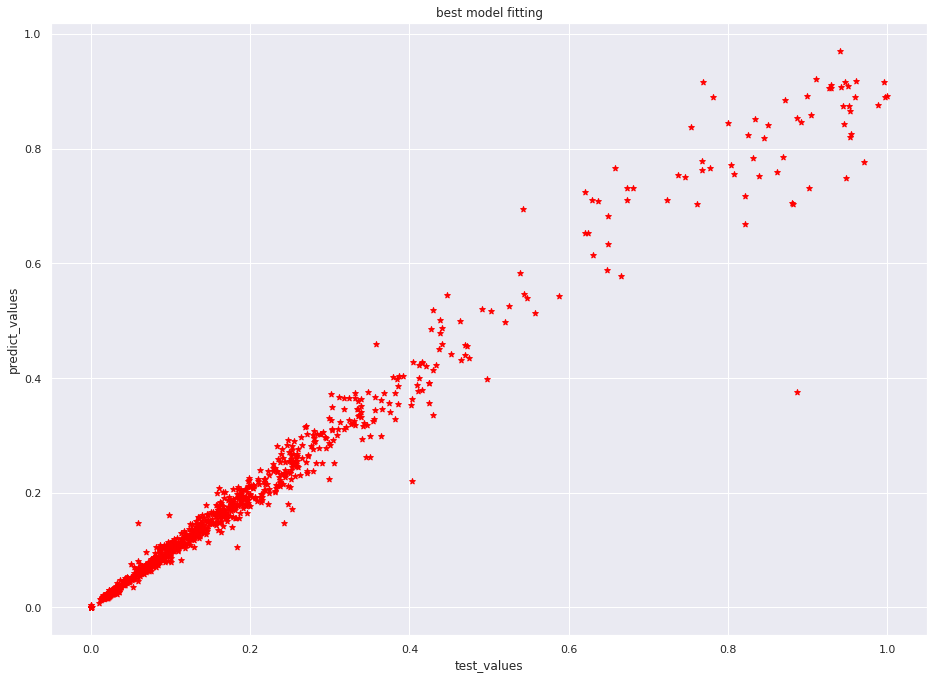

In [229]:
plt.xlabel('test_values')
plt.ylabel('predict_values')
plt.title('best model fitting')
plt.scatter(y_test,y_pred22,color='red',marker='*')
plt.show()

# **PROJECT OBSERVATIONS**

# • We have more sales in germany  when we have type A scheme  folowed by spain because they are making use of opening hour scheme  i.e A type and germany is higher in the department category of all, food ,meat ,non food 

# Italy is making use of all the three opening hour schemes  compare to all the countries

# • Working hours of internal employees are more in the departments of : all , Food ,Meat,Non food

# December 2016 is having highest turnover because of better impact of Type A scheme in Country sweden





# **CONCLUSION**


# 1 ) In this guide, we went over the multi regression,decision tree,and Random Forest Regression models.
# 2 ) We learned the following:Decision trees consists of branches, nodes, and leaves,Ensemble learning.
# 3 ) Procedure when constructing a multi regression,decision tree, and Random Forest Regression models.
# 4 ) Pros/Cons of multi regression,decision tree and Random Forest Regressors.
# 5 ) R² score assesses the accuracy of our model.
# 6 ) mean square error:The lower the mse the better the model.
# 7 ) Random Forest Regression with n_estimators=30 model performed the best out of all the 5 regression models with accurcay of   **0.9788550186030115**




